# ESERCIZIO PANDAS/MATPLOTLIB:

*   Riusciti: Da 1 a 13
*   Non Riusciti: 14, 16
*   In Dubbio: 15



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Crei un dataframe Pandas contenente le informazioni presenti nella collection

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv')
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


2. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [3]:
df.drop(columns=['N','address','grades','restaurant_id'])

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


In [ ]:
df.filter(items=['borough', 'cuisine', 'name'])

3. Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [4]:
df[df['borough'] == 'Missing'].count()

N                51
address          51
borough          51
cuisine          51
grades           51
name             51
restaurant_id    51
dtype: int64

4. Sostituisca alla parola ‘Missing’ il valore null

In [5]:
df['borough'].replace('Missing', np.NaN, inplace=True)

5. Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [26]:
df.dropna(inplace= True)                                                              #.dropna() elimina i valori nulli
df.count()

N                25208
address          25208
borough          25208
cuisine          25208
grades           25208
name             25208
restaurant_id    25208
dtype: int64

6. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina
che ha più ristoranti

In [ ]:
df.groupby('cuisine')['address'].count().sort_values(ascending=False)

In [27]:
df['cuisine'].value_counts()                                                         

American            6183
Chinese             2418
Café/Coffee/Tea     1214
Pizza               1163
Italian             1069
                    ... 
CafÃ©/Coffee/Tea       2
Polynesian             1
Chilean                1
Creole/Cajun           1
Californian            1
Name: cuisine, Length: 85, dtype: int64

7. Visualizzi il tipo di cucina con più ristoranti

In [28]:
Cucine = df.groupby('cuisine').count().reset_index()
Cucine[Cucine['N'] == Cucine['N'].max()]['cuisine']

2    American
Name: cuisine, dtype: object

8. Visualizzi un grafico a barre con i primi 10 tipi di cucina

In [ ]:
fig= plt.figure()
ax = plt.axes()

fig.autofmt_xdate(rotation= 45)

ax.bar(df['cuisine'], df['name'], color= 'green')

9. Calcoli il numero di ristoranti per ogni quartiere

In [6]:
Torta=df.groupby(['borough'],as_index=False).count().sort_values('N',ascending=False)
Torta

,borough,N,address,cuisine,grades,name,restaurant_id
2,Manhattan,10259,10259,10259,10259,10211,10259
1,Brooklyn,6086,6086,6086,6086,6046,6086
4,Queens,5656,5656,5656,5656,5615,5656
0,Bronx,2338,2338,2338,2338,2322,2338
5,Staten Island,969,969,969,969,963,969
3,Missing,51,51,51,51,51,51


10. Visualizzi i dati precedenti in un grafico a torta

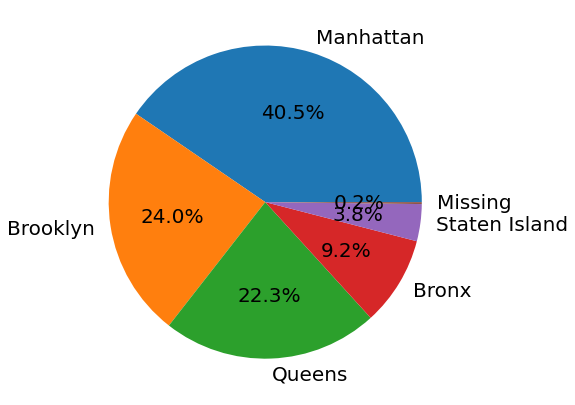

In [8]:
plt.rcParams.update({'font.size' : 20}) # il parametro standard è 10, quindi abbiamo ingrandito del 50%

fig = plt.figure(figsize=(9.6, 7.2)) #crea la figura
ax = plt.axes()
ax.pie(Torta['N'], labels=Torta['borough'], autopct='%.1f%%'  )
plt.show()

11. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici.

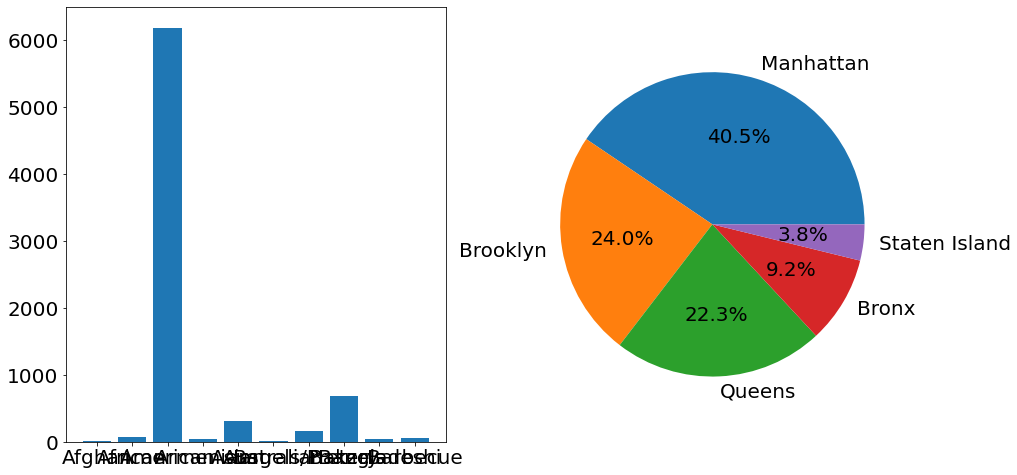

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2)

fig.set_size_inches(15,8)
ax1.bar(Cucine['cuisine'].head(10), Cucine['N'].head(10))
ax2.pie(Torta['N'], labels=Torta['borough'], autopct='%.1f%%')

plt.show()

12. Crei un nuovo dataframe sostituendo la parola &#39;non American&#39; a tutti i tipi di cucina che non sono
americani

In [14]:
df2 = df
df2['cuisine'][df2['cuisine'] != 'American'] = 'non American'
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,non American,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,non American,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,non American,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,non American,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,non American,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,non American,[],NaN,50018721


13. Visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana. Il risultato
deve essere il seguente:

In [15]:
df = df2.groupby(['borough','cuisine'])['name'].count()
df

borough        cuisine     
Bronx          American         411
               non American    1911
Brooklyn       American        1273
               non American    4773
Manhattan      American        3205
               non American    7006
Missing        American          10
               non American      41
Queens         American        1040
               non American    4575
Staten Island  American         244
               non American     719
Name: name, dtype: int64

14. crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una
colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve
essere il seguente:

In [16]:
df.unstack()
df

borough        cuisine     
Bronx          American         411
               non American    1911
Brooklyn       American        1273
               non American    4773
Manhattan      American        3205
               non American    7006
Missing        American          10
               non American      41
Queens         American        1040
               non American    4575
Staten Island  American         244
               non American     719
Name: name, dtype: int64

15. resetti l&#39;indice in modo da avere le tre colonne necessarie per costruire un grafico a barre. Il risultato
deve essere il seguente:

In [17]:
df.reset_index()
df

borough        cuisine     
Bronx          American         411
               non American    1911
Brooklyn       American        1273
               non American    4773
Manhattan      American        3205
               non American    7006
Queens         American        1040
               non American    4575
Staten Island  American         244
               non American     719
Name: name, dtype: int64

16. Visualizzi un istogramma in cui per ogni quartiere si visualizzi una barra con il numero dei ristoranti
americani ed una per quelli non americani. Il risultato deve essere il seguente:

In [ ]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.cuisine.plot(kind='bar', color='red', ax= df['cuisines']=='American', width=width, position=1)
df.cuisine.plot(kind='bar', color='blue', ax=df['cuisines']=='non American', width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

plt.show()